In [1]:
import pandas as pd
import glob
from sklearn.externals import joblib as jl
from modules import venn

%matplotlib inline

In [2]:
sources = ['AHREFS', 'MAJESTIC', 'MOZ', 'SEMRUSH']

In [3]:
for s in sources:
    files = glob.glob("data/!final data/{}/*.csv".format(s)) 

    header = 'infer'
    skiprows = None
    usecols = ['Domain']
    header_saved = False
    for filename in files:
        if s == 'AHREFS':
            header = None
            usecols = None
        elif s == 'MOZ':
            skiprows=5
            usecols = ['Root Domain']

        if not header_saved:
            links = pd.read_csv(filename, header=header, skiprows=skiprows, usecols = usecols)
            header_saved = True
        else: links = links.append(pd.read_csv(filename, header=header, skiprows=skiprows,
                                               usecols = usecols), ignore_index=True)

    jl.dump(links, 'data/{}.jl'.format(s), compress=1)

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


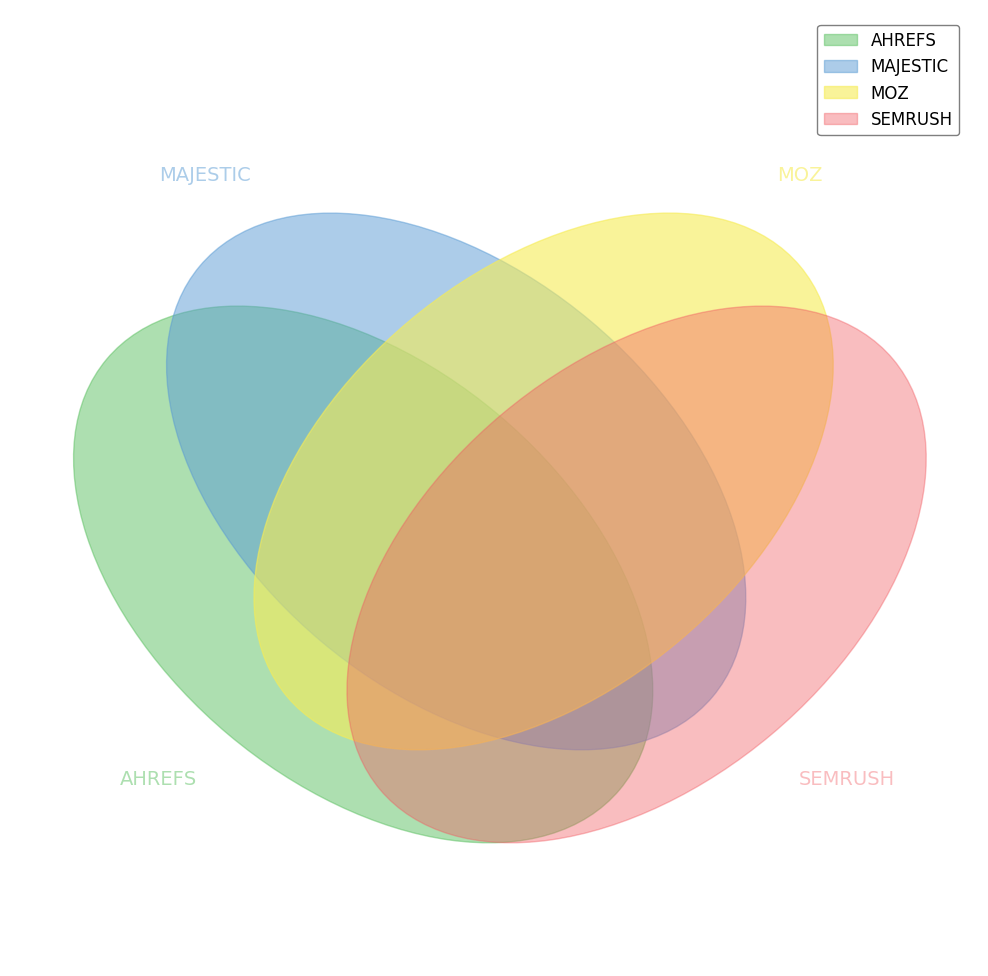

In [5]:
labels = venn.get_labels([AHREFS, MAJESTIC, MOZ, SEMRUSH], fill=sources)
fig, ax = venn.venn4(labels, names=sources)
fig.show()
fig.savefig('venn-elipse')

In [8]:
AHREFS = jl.load('data/AHREFS.jl')[0].apply(lambda x: x.rstrip('/')).drop_duplicates().to_frame(name='Domain')
MAJESTIC = jl.load('data/MAJESTIC.jl')['Domain'].apply(lambda x: x.rstrip('/')).drop_duplicates().to_frame(name='Domain')
MOZ = jl.load('data/MOZ.jl')['Root Domain'].apply(lambda x: x.rstrip('/')).drop_duplicates().to_frame(name='Domain')
SEMRUSH = jl.load('data/SEMRUSH.jl')['Domain'].apply(lambda x: x.rstrip('/')).drop_duplicates().to_frame(name='Domain')

In [10]:
AHREFS['Source'] = 'AHREFS'
MAJESTIC['Source'] = 'MAJESTIC'
MOZ['Source'] = 'MOZ'
SEMRUSH['Source'] = 'SEMRUSH'

In [11]:
all_sites = pd.concat([AHREFS, MAJESTIC, MOZ, SEMRUSH])
all_sites.head()

,Domain,Source
0,incolors.club,AHREFS
1,gilgendoorsystems.cn,AHREFS
2,crayon.co,AHREFS
3,180find.com,AHREFS
4,axisautomatic.com,AHREFS


In [12]:
all_sites.to_csv('data/all_sites.csv')